# Linear Regression for multiple features from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Train.csv')

In [3]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [5]:
Xtrain = data.iloc[:,0:5]

In [6]:
Xtrain.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [8]:
Ytrain = data.iloc[:,-1]

In [9]:
Ytrain.head()

0   -82.154667
1   -48.897960
2    77.270371
3    -2.988581
4   -37.596722
Name: target, dtype: float64

In [10]:
Xtrain = Xtrain.values
Ytrain = Ytrain.values

In [11]:
u = Xtrain.mean(axis = 0)
std = Xtrain.std(axis = 0)
Xtrain = (Xtrain - u)/std

In [13]:
ones = np.ones((Xtrain.shape[0],1))

In [14]:
Xtrain = np.hstack((ones,Xtrain))

In [21]:
print(Xtrain.shape,Ytrain.shape)

(1600, 6) (1600,)


In [16]:
print(Xtrain[:5,:])

[[ 1.          0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [ 1.         -0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 1.          0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 [ 1.          0.17170821  0.16721032 -0.53057575 -0.07837668 -1.33303676]
 [ 1.         -1.70218787  0.55833582 -2.72308713 -0.63362489  1.25933909]]


In [17]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [18]:
def error(X,Y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y_ - Y)**2)
    return e/m

In [19]:
def gradient(X,Y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - Y))
    return grad/m

In [29]:
def gradientDescent(X,Y,lr = 0.1,max_step = 100):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = list()
    for i in range(max_step):
        e = error(X,Y,theta)
        error_list.append(e)
        grad = gradient(X,Y,theta)
        theta = theta - lr*grad
    return theta,error_list

In [30]:
theta , error_list = gradientDescent(Xtrain,Ytrain)

In [31]:
print(theta)

[ 0.31882692 29.59234868 94.64766952  8.37318663 45.52116937  2.46359567]


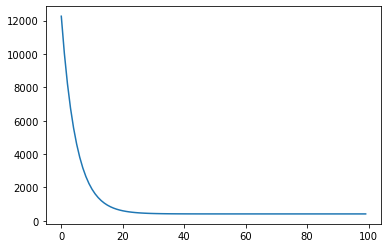

In [32]:
plt.plot(error_list)
plt.show()

In [33]:
print(error_list)

[12256.130414032896, 10026.033684143073, 8217.05525281762, 6749.466627013956, 5558.673187089289, 4592.334067473993, 3808.0315657917154, 3171.3849608951386, 2654.523779945838, 2234.85183834815, 1894.04653113265, 1617.2484830009766, 1392.4052530232816, 1209.7397313936942, 1061.3194764678278, 940.7077762355075, 842.6808858642626, 762.9988586786471, 698.2197865343776, 645.5492057333446, 602.7179942368198, 567.8833559297996, 539.5485154072411, 516.4975785302777, 497.742687289827, 482.48114259194153, 470.06060992121974, 459.95088023812474, 451.7209479296336, 445.0204021068502, 439.5643175010901, 435.12098512481214, 431.5019475920107, 428.5539050830668, 426.15213988278555, 424.1951738531029, 422.60042706729115, 421.3006895139443, 420.2412532069083, 419.3775807751255, 418.67340992065016, 418.0992120500355, 417.63093873539134, 417.24900212055684, 416.9374455012189, 416.68326851820393, 416.475878069587, 416.30664146076725, 416.16852270834255, 416.0557864849475, 415.96375709353566, 415.8886222169

In [34]:
Y_train_pred = hypothesis(Xtrain,theta)

In [35]:
def r2score(Ytrue,Ypred):
    num = np.sum((Ytrue - Ypred)**2)
    den =np.sum((Ytrue - Ytrue.mean())**2)
    score = 1 - (num / den)
    return score*100

In [36]:
Y_train_pred.shape

(1600,)

In [37]:
Ytrain.shape

(1600,)

In [38]:
score = r2score(Ytrain,Y_train_pred)
print(score)

96.60939654502222


In [39]:
test_data = pd.read_csv('./Test.csv')

In [40]:
test_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [41]:
Xtest = test_data.values

In [42]:
Xtest = (Xtest - u)/std

In [43]:
print(Xtest[0])

[ 1.01415586  2.05962126 -0.21946227 -2.33626389 -1.01447386]


In [44]:
ones = np.ones((Xtest.shape[0],1))

In [45]:
Xtest = np.hstack((ones,Xtest))

In [46]:
print(Xtest[0])

[ 1.          1.01415586  2.05962126 -0.21946227 -2.33626389 -1.01447386]


In [47]:
Ytest_pred = hypothesis(Xtest,theta)

In [48]:
Id = np.arange(0,Xtest.shape[0])

In [49]:
print(Id.shape,Ytest_pred.shape)

(400,) (400,)


In [50]:
Id = Id.reshape((400,1))

In [52]:
Ytest_pred = Ytest_pred.reshape((400,1))

In [53]:
Ytest_pred = np.hstack((Id,Ytest_pred))

In [55]:
print(Ytest_pred[0])

[  0.        114.5821174]


In [56]:
df = pd.DataFrame(data= Ytest_pred,columns=['Id','y'],dtype=np.int32)

In [57]:
df.head()

,Id,y
0,0,114
1,1,118
2,2,-21
3,3,-43
4,4,-95


In [58]:
df.to_csv('y_predictions.csv',index = None)